<a href="https://colab.research.google.com/github/dderyashn/MNIST-Image-Classification/blob/main/MNIST_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random 

In [112]:
#For repeatable results
np.random.seed(0) 

In [113]:
#Loading the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [114]:
#There are 60000 images in our train data and same for the test data
#The number of labels should equal to the number of images, so we have to check that
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [115]:
assert(X_train.shape[0] == y_train.shape[0]), "Error: The number of train images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "Error: The number of test images is not equal to the number of labels"
assert(X_train.shape[1:] == (28,28)), "Error: The dimensions of the train images should be equal to 28x28"
assert(X_test.shape[1:] == (28,28)), "Error: The dimensions of the test images should be equal to 28x28"

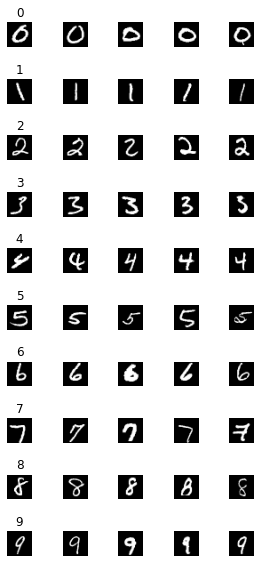

In [116]:
#Plotting the data: We can visualize our data 
sample_number = []
columns = 5 #Random set of 5 images from each of the categories
classes_number = 10 #Since there are 10 number from 0 to 9

fig, axis = plt.subplots(nrows = classes_number, ncols = columns, figsize = (4,8))
fig.tight_layout() #Avoid overlap

#Looping through every column and iterating through every row
for i in range(columns):
  for j in range(classes_number):
    x_selected = X_train[y_train == j] #Filtering out the images which don't belong to that class
    axis[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap = plt.get_cmap("gray"))
    axis[j][i].axis("off") #Making images appearing without labeled axis
    if i == 0:
      axis[j][i].set_title(str(j)) #Setting title for each class
      sample_number.append(len(x_selected))
       
    

In [117]:
#To see the amount of images in each class
print(sample_number)

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of Images')

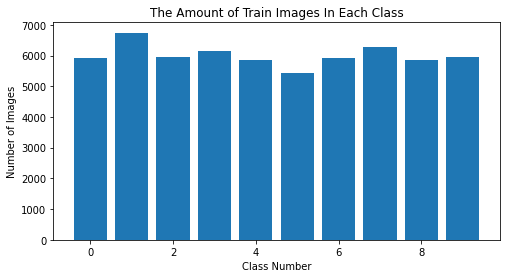

In [118]:
plt.figure(figsize = (8,4))
plt.bar(range(0, classes_number), sample_number) 
plt.title("The Amount of Train Images In Each Class")
plt.xlabel("Class Number")
plt.ylabel("Number of Images")

In [119]:
#Preparing The Data For Regular Neural Network


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#Normalization Process
X_train = X_train/255
X_test = X_test/255

pixel_number = 784
X_train = X_train.reshape(X_train.shape[0], pixel_number)
X_test = X_test.reshape(X_test.shape[0], pixel_number)

print(X_train.shape)


(60000, 784)


In [120]:
#Creation of the Neural Network

def create_model():
  model = Sequential()
  model.add(Dense(10, input_dim = pixel_number, activation = 'relu'))
  model.add(Dense(30, activation = 'relu'))
  model.add(Dense(10, activation = 'relu'))
  model.add(Dense(classes_number, activation = 'softmax'))
  model.compile(Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [121]:
model = create_model()
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_13 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [122]:
history = model.fit(X_train, y_train, validation_split = 0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

Epoch 1/10
270/270 [==============================] - 2s 4ms/step - loss: 0.5103 - accuracy: 0.8426 - val_loss: 0.2389 - val_accuracy: 0.9322
Epoch 2/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2661 - accuracy: 0.9214 - val_loss: 0.2009 - val_accuracy: 0.9420
Epoch 3/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2346 - accuracy: 0.9311 - val_loss: 0.2100 - val_accuracy: 0.9330
Epoch 4/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2106 - accuracy: 0.9370 - val_loss: 0.1729 - val_accuracy: 0.9467
Epoch 5/10
270/270 [==============================] - 1s 3ms/step - loss: 0.1944 - accuracy: 0.9424 - val_loss: 0.1594 - val_accuracy: 0.9507
Epoch 6/10
270/270 [==============================] - 1s 3ms/step - loss: 0.1862 - accuracy: 0.9446 - val_loss: 0.1591 - val_accuracy: 0.9538
Epoch 7/10
270/270 [==============================] - 1s 3ms/step - loss: 0.1767 - accuracy: 0.9479 - val_loss: 0.1454 - val_accuracy: 0.9573
Epoch 

Text(0.5, 0, 'Epoch')

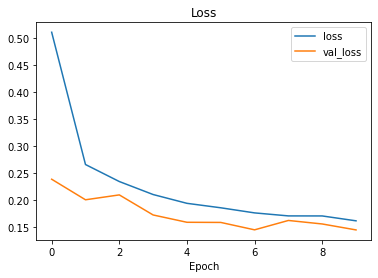

In [123]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

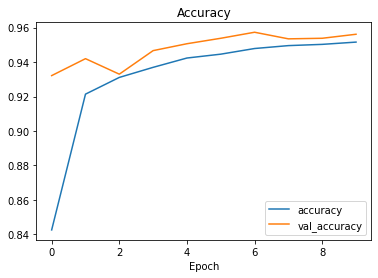

In [124]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')

In [125]:
#Testing the Model

score = model.evaluate(X_test, y_test, verbose = 0)
print('Test score: ', score[0])
print('Test accuracy: ', score[1])

Test score:  0.19018177688121796
Test accuracy:  0.9438999891281128


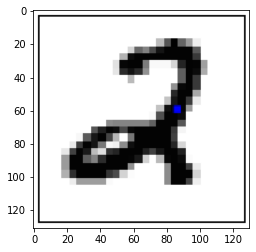

In [126]:
import requests
from PIL import Image

url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

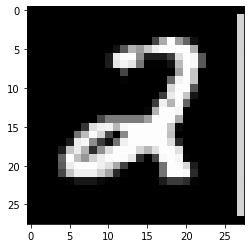

In [127]:
import cv2

img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [128]:
#Normalizing the Image

img = img/255
img = img.reshape(1, 784)

In [144]:
prediction = np.argmax(model.predict(img), axis=-1)
print("Predicted number: ", str(prediction))

Predicted number:  [2]
